# Pipelines



---


[documentação](https://scikit-learn.org/stable/index.html) <br>


---

>[Pipelines](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos aplicar um processamento genérico](#scrollTo=BKzodGb8R7t9)

>>>[3.1.  Removemos as colunas com pouca informação](#scrollTo=rEuiN5R7Przw)

>>>[3.2.  Removemos as linhas de embarked sem valor](#scrollTo=c4ZBqVliAQ0V)

>>[4. Vamos fazer o train test split](#scrollTo=vevBCPmAm2K9)

>>[5. Vamos definir o nosso pipeline](#scrollTo=iIFgSiGFuxbl)

>>[6. Aplicamos o pipeline](#scrollTo=73M-ivqdxRkQ)

>>[7. Avaliamos os resultados](#scrollTo=Uczo3UrRxozn)

>>[8. E a gridSearch?](#scrollTo=NAlheW90yP5b)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [1]:
# packages gerais
import pandas as pd
import numpy as np

# vamos importar o dataset do titanic
df = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/titanic.csv")

## 2.&nbsp;Vamos explorar o dataset

In [2]:
# vamos avaliar os dados em falta
df.isna().sum()
# df[df.isna().sum(axis = 1) > 1]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# exploração inicial
df.head()
# df.info()
# df.shape
# df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.&nbsp;Vamos aplicar um processamento genérico

### 3.1.&nbsp; Removemos as colunas com pouca informação

In [5]:
# fazemos um simples drop
df.drop('Cabin', axis=1, inplace=True)

### 3.2.&nbsp; Removemos as linhas de embarked sem valor

In [6]:
# vamos fazer dropna para remover os 2 casos que faltam
df.dropna(subset=['Embarked'], inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 4.&nbsp;Vamos fazer o train test split

In [8]:
# definimos a variável alvo
target_variable = "Survived"

# train_test split usando a função train_test_split
X = df.drop(["PassengerId", "Name", "Ticket", target_variable], axis = 1)
y = df[target_variable]
y.sum()/len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)

## 5.&nbsp;Vamos definir o nosso pipeline

In [9]:
# vamos importar os transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# vamos definir o processamento das variáveis numéricas
numeric_features = ["Age", "Fare"]
age_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

fare_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer())
])

# vamos definir o processamento das variáveis categóricas
categorical_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# vamos combinar os processos
preprocessor = ColumnTransformer(transformers=[
    ('age', age_transformer, ["Age"]),
    ('fare', fare_transformer, ["Fare"]),
    ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# vamos crear o pipeline com processamento e modelação
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=250))
])



In [10]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=250))])

## 6.&nbsp;Aplicamos o pipeline

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# fazemos o fit do pipeline
pipeline.fit(X_train, y_train)

# prevemos os valores de teste
y_pred = pipeline.predict(X_test)

c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## 7.&nbsp;Avaliamos os resultados

[[137  28]
 [ 30  72]]
              precision    recall  f1-score   support

      morreu       0.82      0.83      0.83       165
  sobreviveu       0.72      0.71      0.71       102

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


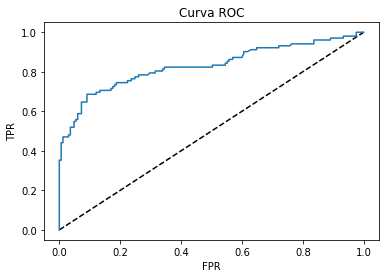

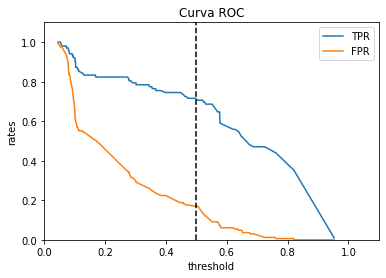

AUC: 0.8291740938799763


In [12]:
# avaliamos o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['morreu', 'sobreviveu']))

# ROC curve and AUC
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('Curva ROC')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

## 8.&nbsp;E a gridSearch?

In [13]:
# importamos a grid search
from sklearn.model_selection import GridSearchCV

# temos de definir os dados para a grid
param_grid = {
    'classifier__C': [1, 10, 100, 1000],
    'classifier__penalty': [None, 'l2']
}

# creamos a grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# fazemos o fit da grid search
grid_search.fit(X_train, y_train)

c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-pack

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('fare',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'classifier__C': [1, 10, 100, 1000],
                         'classifier__penalty': [None, 'l2']},
             scoring='accuracy')

In [14]:
# vamos ver os melhores parameters
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'classifier__C': 1, 'classifier__penalty': 'l2'}


In [15]:
# obtemos o melhor modelo
best_model = grid_search.best_estimator_

# vamos prever usando o melhor modelo
y_pred = best_model.predict(X_test)

c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[[137  28]
 [ 30  72]]
              precision    recall  f1-score   support

      morreu       0.82      0.83      0.83       165
  sobreviveu       0.72      0.71      0.71       102

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



c:\Users\yfreitas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


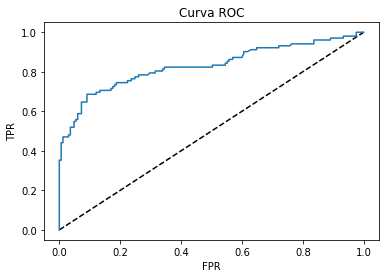

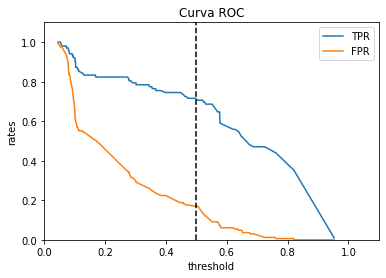

AUC: 0.8291740938799763


In [16]:
# avaliamos o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['morreu', 'sobreviveu']))

# ROC curve and AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.show()

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.plot(thresholds[1:], TPR[1:])
plt.plot(thresholds[1:], FPR[1:])
plt.plot([0.5, 0.5], [0, 1.1], 'k--')
plt.xlabel('threshold')
plt.ylabel('rates')
plt.legend(['TPR', 'FPR'])
plt.title('Curva ROC')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
